<a href="https://colab.research.google.com/github/Bilqis1424/Bilikis.io/blob/main/10ALYTICS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING LIBERIES**

In [ ]:
#LETS IMPORT THE LIBERARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Set up the figure size for better readability
plt.figure(figsize=(10, 5))
import seaborn as sns
# Set the theme for seaborn
sns.set_theme(style="whitegrid")

<Figure size 1000x500 with 0 Axes>

#**LOADING THE DATASET AND MOUNTING MY DRIVE**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 1.Perform exploratory data analysis in Python:

 a) Visualize relationships between the label and some key features

 b) Explore correlations

 c) Conduct univariate, bivariate, and multivariate analysis as much as is feasible

In [ ]:
# Lets Load the dataset
df = pd.read_csv('/content/drive/MyDrive/10ALYTICS/Customer-Churn.csv')

#1. **Data Understandiong and Exploration (EDA)**

Data understanding and exploration refers to the process of reviewing and analyzing a dataset in order to gain a deeper understanding of the data, its characteristics, and any patterns or relationships that may exist within it. This step is crucial in the data science process as it helps to identify any potential issues or biases in the data, and inform the decisions made in later steps such as feature selection and modeling. Techniques used in data understanding and exploration include descriptive statistics, visualization, and data cleaning.

In [ ]:
#Let visualize the first 5 rows of the Dataset df.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Let's visualize the last 5 rows of the *df*.
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# number of volum and row
df.shape

(7043, 25)

In [ ]:
#
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


SeniorCitizen, tenure and MonthlyCharges are numerical while others are objects

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


The output of the data_df.describe() function is a table that provides some basic statistical information about the numerical columns of the dataframe df. The table includes the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile and maximum values for each of the columns. where the features include "SeniorCitizen	tenure and	MonthlyCharges".

The SeniorCitizen	tenure and	MonthlyCharges count is7043.00 without missing values, average are 0.16, 32.37 and 64.76 respectively and so on

### Meaning and Type of Features

In [ ]:
df.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
#Displaying only the numerical features
DataProcess.Numerical(df)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,29.85,0
1,1,0,0,0,34,1,0,56.95,0
2,1,0,0,0,2,1,1,53.85,1
3,1,0,0,0,45,0,0,42.30,0
4,0,0,0,0,2,1,1,70.70,1
...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,0
7039,0,0,1,1,72,1,1,103.20,0
7040,0,0,1,1,11,0,1,29.60,0
7041,1,1,1,0,4,1,1,74.40,1


In [ ]:
#Display only the categorical features
cat_features = df.select_dtypes(include=object)
cat_features.describe()

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,3,3,3,3,3,3,6531
top,No,No,No,No,No,No,No,
freq,3390,3498,3088,3095,3473,2810,2785,11


In [ ]:
class DataProcess:
          def __init__(self,df):
                 self.df = df
          def Numerical(df):
                 return df.select_dtypes(include = ['int64' , 'float64'])
          def Categorical(df):
                  return df.select_dtypes(include = ['object'])
          def Missing(df):
                  return sns.heatmap(df.isnull(), cbar = False, cmap='viridis')
          def df_joiner(df1, df2):
                 return pd.concat(df1, df2)
          def get_month(x):
                return (x.month)
          def get_year(x):
                return (x.year)
          def get_day(x):
                return (x.day)
          def correlation_map(df):
                f, ax = plt.subplots(figsize= (15,10))
                return sns.heatmap(data=df.corr(), annot = True);



<Axes: >

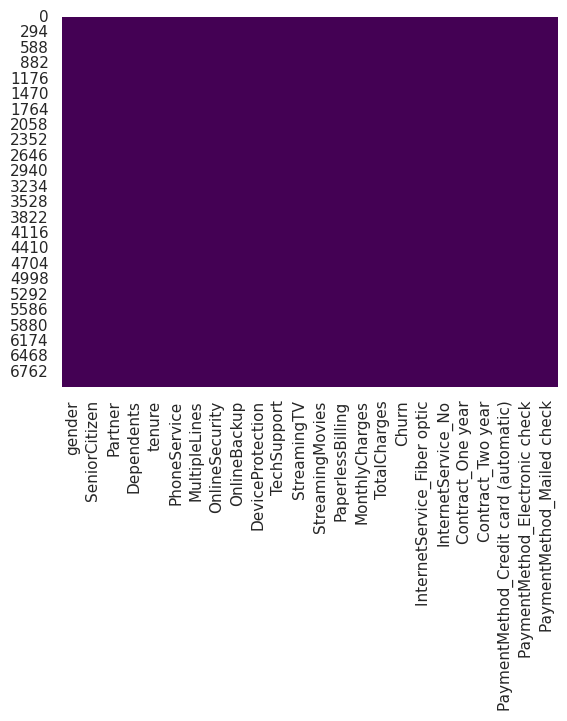

In [ ]:
DataProcess.Missing(df)

The DataProcess was used to drwan heat map for Missing values   
which shows that there are no missing data from the features
To call the function, we use DataProcess.Missing (df)

#Exploratory Data Analysis (EDA)

#Visualize Relationships Between the Label and Key Features

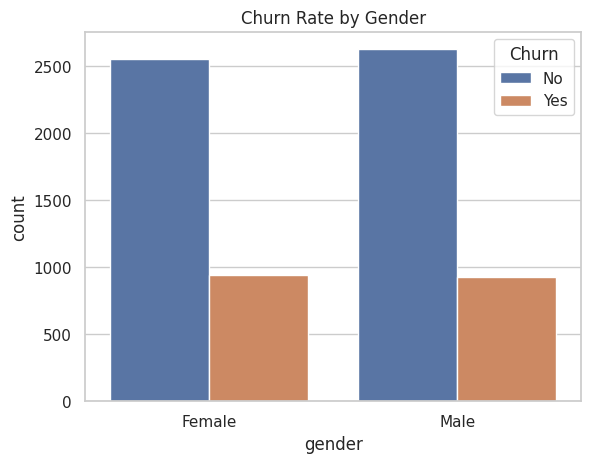

In [ ]:
# 1. Bar plot of churn rate by gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Rate by Gender')
plt.show()


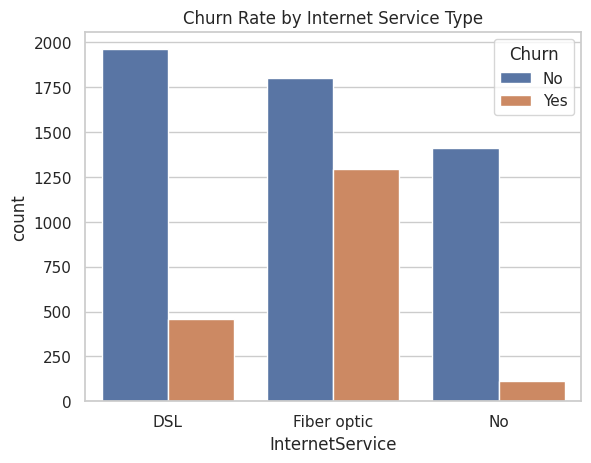

In [ ]:
# 2. Churn rate by Internet Service type
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Rate by Internet Service Type')
plt.show()

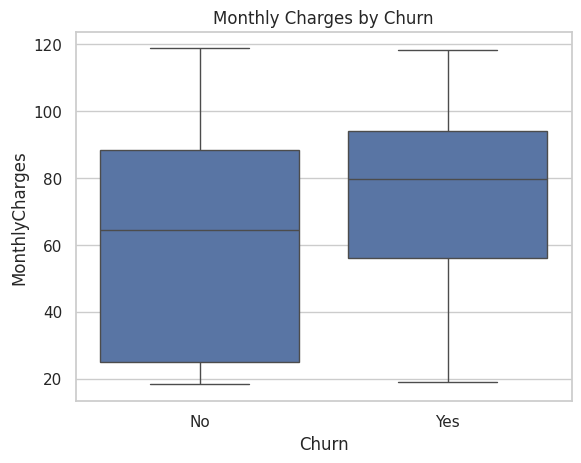

In [ ]:
# 3. Distribution of Monthly Charges for Churned vs Non-Churned Customers
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

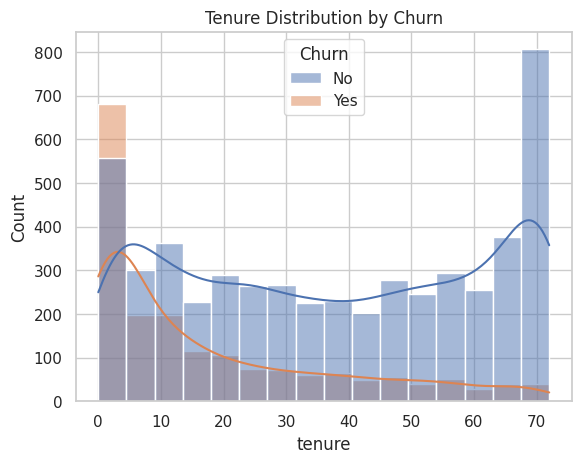

In [ ]:
# 4. Tenure distribution for Churned vs Non-Churned Customers
sns.histplot(data=df, x='tenure', hue='Churn', kde=True)
plt.title('Tenure Distribution by Churn')
plt.show()

###EXPLORE CORRELATIONS

In [ ]:
# Generate a correlation matrix for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'No phone service'

<Figure size 1200x800 with 0 Axes>

###Lets Conduct Univariate, Bivariate, and Multivariate Analysis

###Univariate Analysis: Distribution of continuous variables like MonthlyCharges and TotalCharges.

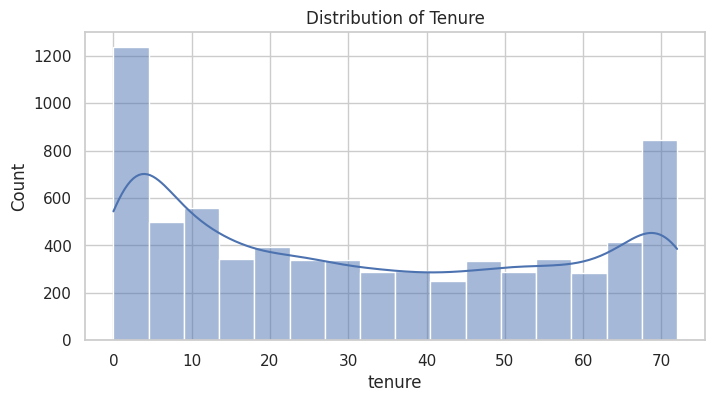

In [ ]:
# Distribution of Tenure
plt.figure(figsize=(8, 4))
sns.histplot(df['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.show()

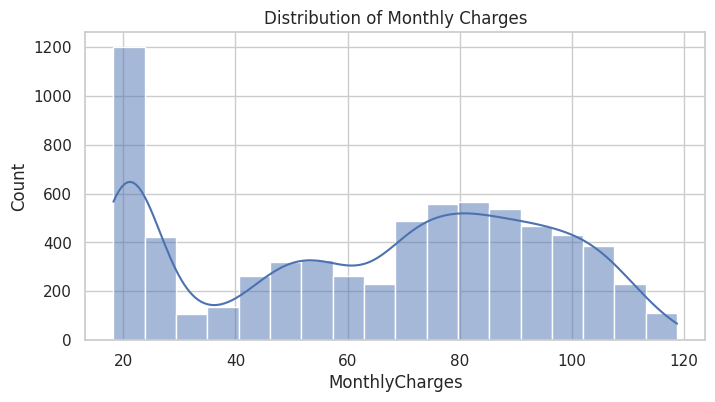

In [ ]:
# Distribution of Monthly Charges
plt.figure(figsize=(8, 4))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()


###Bivariate Analysis: Relationships between selected variables and churn.

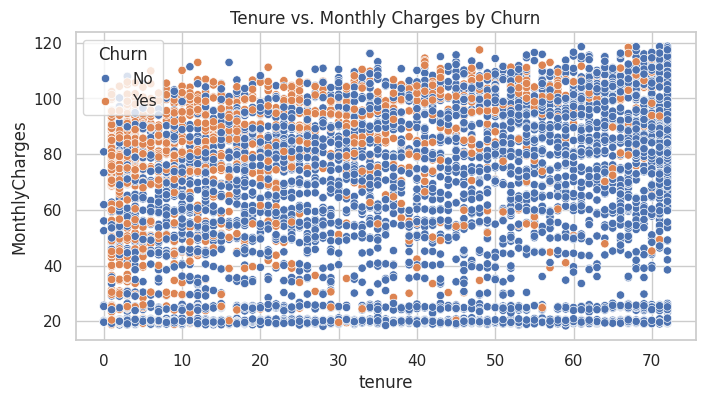

In [ ]:
# Scatter plot between Tenure and Monthly Charges, colored by Churn
plt.figure(figsize=(8, 4))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs. Monthly Charges by Churn')
plt.show()


###Multivariate Analysis: Examining more complex interactions
###(e.g., between InternetService, Contract, and Churn).

In [ ]:
# Multivariate plot: Contract type vs. Internet Service, colored by Churn
plt.figure(figsize=(8, 4))
sns.violinplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, split=True)
plt.title('Contract Type and Monthly Charges by Churn')
plt.show()


Univariate Analysis
Plot histograms or boxplots to explore the distribution of features like MonthlyCharges, TotalCharges, and Tenure

<ipython-input-27-a5a0208674bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


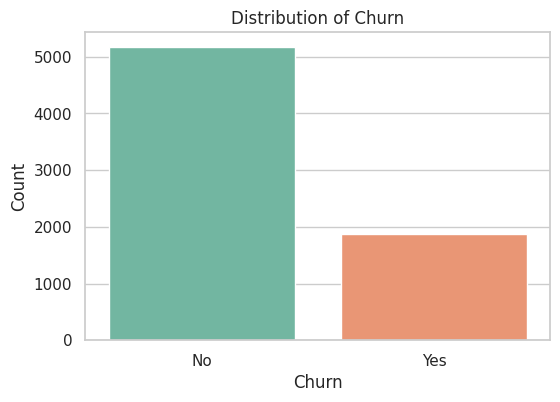

In [ ]:

# Lets Visualize the overall distribution of the Churn variable by ploting the distribution
#to understand the balance between churned and retained customers.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()



<ipython-input-28-9d85b0c7aed0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='Set1')


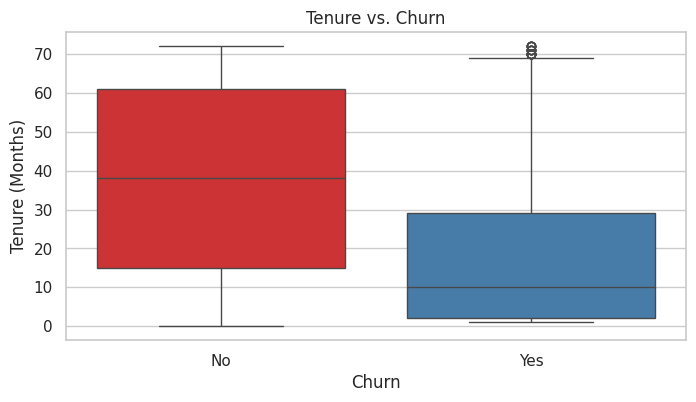

In [ ]:
# Lets Plot tenure against Churn to see if there’s a trend
# in how long a customer has been with the company and their likelihood to churn
# Tenure vs. Churn
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set1')
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()


<ipython-input-23-8cb6027038c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')


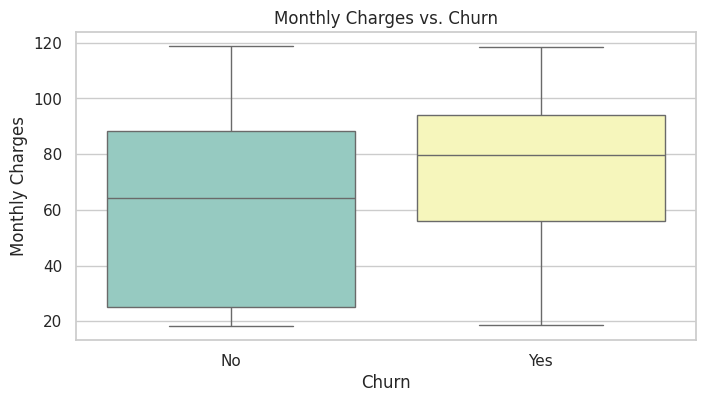

In [ ]:
# Plot MonthlyCharges against Churn
#to see if higher charges are associated with a higher churn rate.
# MonthlyCharges vs. Churn
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


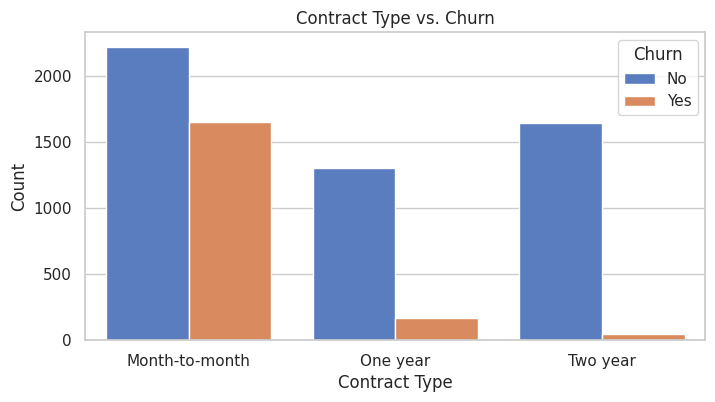

In [ ]:
#Ploting Contract type against Churn to understand if customers
#with certain types of contracts are less likely to churn.
# Contract Type vs. Churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='muted')
plt.title('Contract Type vs. Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


The Plots above explanation is as follow:

Churn Distribution: Shows the proportion of customers who churned vs. those who stayed.
Tenure against the target (Churn): Compares how long customers stayed with ConnectTel before churning.
MonthlyCharges  against the target (Churn): Investigates if high monthly charges correlate with higher churn.
Contract Type  against the target (Churn): Shows the impact of different contract types ( month-to-month, one-year, and two years.) on the target variable (churn).

In [ ]:
ax=sns.countplot(x="Churn", data=df);

###Perform Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Encode binary categorical variables
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for feature in binary_features:
    df[feature] = le.fit_transform(df[feature])

# 2. One-hot encode categorical variables with more than two categories
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# 3. Create new feature: Monthly to Total Charges ratio (may indicate loyalty or payment stability)
df['ChargesRatio'] = df['TotalCharges'] / (df['MonthlyCharges'] + 1)  # Adding 1 to avoid division by zero

# 4. Check for any missing values in the new feature
df['ChargesRatio'].fillna(0, inplace=True)

# Display the first few rows of the updated DataFrame
df.head()


KeyError: "None of [Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')] are in the [columns]"